In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Files/Computer Vision/img1.csv')
df.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [3]:
X = df.drop('label', axis=1)

y = df['label']

In [4]:
X.drop('Unnamed: 0',axis=1,inplace=True)
X

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0         A
1         A
2         A
3         A
4         A
         ..
372446    Z
372447    Z
372448    Z
372449    Z
372450    Z
Name: label, Length: 372451, dtype: object

**Train and Testing**

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=50)

In [7]:
print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(279338, 784) (279338,)
(93113, 784) (93113,)


**Logistic Regression**

In [8]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

Result1 = metrics.accuracy_score(y_test, y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 7min 23s, sys: 48.6 s, total: 8min 11s
Wall time: 4min 41s


In [9]:
print("Logistic Regression Accuracy : ", Result1)

Logistic Regression Accuracy :  0.8793294169450023


**Decision Tree**

In [10]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

Result2 = metrics.accuracy_score(y_test, y_test_pred)


CPU times: user 1min 33s, sys: 231 ms, total: 1min 33s
Wall time: 1min 33s


In [11]:
print("Decision Tree Accuracy : ", Result2)

Decision Tree Accuracy :  0.9475583430885054


**Random Forest**

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

Result3 = metrics.accuracy_score(y_test, y_test_pred)


CPU times: user 4min 17s, sys: 1.04 s, total: 4min 18s
Wall time: 4min 18s


In [13]:
print("Random Forest Accuracy : ", Result3)

Random Forest Accuracy :  0.9853618721338588


**Naive Bayes**

In [14]:
%%time
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

Result4 = metrics.accuracy_score(y_test, y_test_pred)

CPU times: user 16.7 s, sys: 859 ms, total: 17.5 s
Wall time: 17.5 s


In [15]:
print("Naive Bayes Accuracy : ", Result4)

Naive Bayes Accuracy :  0.5554648652712296


**AdaBoost**

In [16]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

Result5 = metrics.accuracy_score(y_test, y_test_pred)

CPU times: user 4min 37s, sys: 2.45 s, total: 4min 40s
Wall time: 4min 40s


In [17]:
print("AdaBoost Accuracy : ", Result5)

AdaBoost Accuracy :  0.5593848334818984


**KNN**

In [18]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

Result6 = metrics.accuracy_score(y_test, y_test_pred)


CPU times: user 43min 47s, sys: 50.9 s, total: 44min 38s
Wall time: 28min 2s


In [19]:
print("KNN Accuracy : ", Result6)

KNN Accuracy :  0.9584590766058445


In [20]:
dic={'Name': ['LogisticRegression_C', 'DecisionTree_C', 'RandomForest_C', 'NaiveBayes_C', 'AdaBoost_C', 'KNN_C'], 'values': [Result1 ,Result2, Result3, Result4, Result5, Result6]}
df1 = pd.DataFrame(dic)
df1

,Name,values
0,LogisticRegression_C,0.879329
1,DecisionTree_C,0.947558
2,RandomForest_C,0.985362
3,NaiveBayes_C,0.555465
4,AdaBoost_C,0.559385
5,KNN_C,0.958459


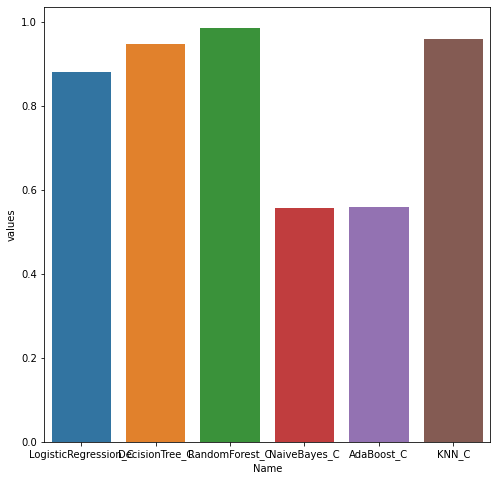

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.barplot(data=df1, x='Name', y='values')

The First Best Accuracy is **98.5%** from **Random Forest** with **4Mins 18S**

The Second Best Accuracy is **95.8%** from **KNN** with **28Mins 2S**